<a href="https://colab.research.google.com/github/sofiafaija/prope_programacion/blob/main/46884_(devolucion)_39130_25565_an%C3%A3%C2%A1lisis_multivariado_del_proyecto_fraude_crediticio_multivariado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Consigna

## Realizar un pequeño análisis Multivariado de datos, teniendo en cuenta las características de las observaciones. Generar al menos 3 gráficos asociados

Que es lo que se espera de acuerdo a Jaime
Matriz de graficas de todas contra todas con su respectivo color, con un cambio de color, nosotros decidimos la variable categorica
o si quieren hacer varios 
la matriz de gráficas
la matriz de correlaciones
el mapa de color, la diagonal inferior, hacer el jointplot

Resumen:
-matriz de figuras el pairplot con una variable categórica cambiando el color
-matriz de correlaciones pero con la diagonal inferior
y el joinplot para una serie de variables que consideren relevantes con los respectivos insite. Que es lo que parecia y que quieren hacer con esas variables. al final tienen una hipotesis la idea es verificar si se va a cumplir y si no ver que es lo que vamos a hacer



In [ ]:
#!pip install plotly
import os 
import plotly.express as px
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
path= os.getcwd()
path

'/home/matias.souto/Dev/TutoriasDSCoder/DataScienceTutorias_01_2022/Correcciones/Grupos/Grupo 8 -Faija - T Vitola - Sanchez - Merino'

In [ ]:
ds_fraude = pd.read_csv('./data_set_fraude.csv', sep=",")
ds_fraude.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
#ds_fraude=pd.read_csv(r'C:\Users\Sofia\data_set_fraude.csv', sep=",")
#ds_fraude.head()

In [ ]:

corr = ds_fraude.corr ()
corr.style.background_gradient (cmap = 'coolwarm')

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


Ahora cruzamos las variables numéricas entre ellas y adiconalmente agregamos el Target para conocer la distribución y comenzar a generar hipótesis de variables que discriminan mejor a ambos grupos (Fraude).

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(y='oldbalanceOrg', data=ds_fraude)
plt.show()

In [ ]:
#Tirar countplot en el dataset entero con 6.000.000 de registros no es una buena idea
#Si quieren hacer eso que dicen arriba, deberian hacer algo asi:
ds_fraude_by_target=ds_fraude.groupby('isFraud')
ds_fraude_by_target['oldbalanceOrg'].value_counts()

isFraud  oldbalanceOrg
0        0.00             2102408
         184.00               918
         133.00               914
         195.00               912
         109.00               908
                           ...   
1        47316255.05            1
         49585040.37            1
         50399045.08            1
         57316255.05            1
         59585040.37            1
Name: oldbalanceOrg, Length: 1845961, dtype: int64

In [ ]:
ds_fraude_by_target[['oldbalanceOrg','newbalanceOrig']].mean()

,oldbalanceOrg,newbalanceOrig
isFraud,,
0,8.328287e+05,855970.228109
1,1.649668e+06,192392.631836


In [ ]:
ds_fraude_by_target[['oldbalanceOrg','newbalanceOrig']].median()


,oldbalanceOrg,newbalanceOrig
isFraud,,
0,14069.00,0.0
1,438983.45,0.0


## Una vez que tienen hecho el dato ahí sí pueden pasar a graficarlos

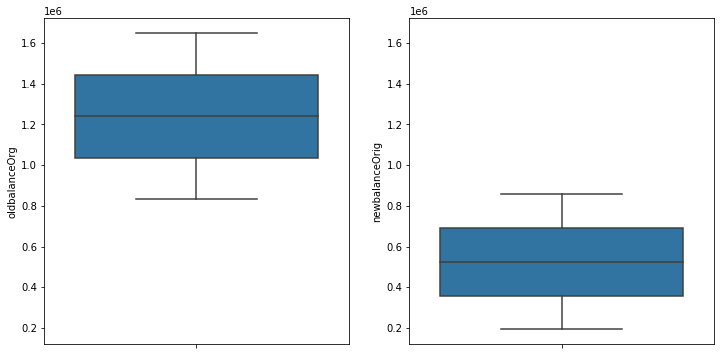

In [ ]:
fig,axes= plt.subplots(figsize=(12,6), ncols=2)
sns.boxplot(y=ds_fraude_by_target['oldbalanceOrg'].mean(), ax=axes[0])
sns.boxplot(y=ds_fraude_by_target['newbalanceOrig'].mean(), ax=axes[1])
axes[0].sharey(axes[1])

In [ ]:
#Completar
plt.figure(figsize=(20,5))
sns.histplot(data=ds_fraude, x= ds_fraude.oldbalanceOrg, kde=True)

In [ ]:
#Completar
plt.figure(figsize=(20,5))
sns.histplot(data=df, x= df.total_bill, kde=True, bins=20,label='Total bill', color='green', alpha=0.3)
sns.histplot(data=df, x= df.tip, kde=True, label='Tips', color='blue', alpha=0.3)
plt.legend()
plt.xlabel('Valor')
plt.ylabel('frecuencia')
plt.title('Distribución de la cuenta total', fontsize=20)
plt.show()

NameError: name 'df' is not defined

<Figure size 1440x360 with 0 Axes>

<img src="output.png">